In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#checking columns
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
#chance of admit column as extra space which must be taken out
df = df.rename(columns={'Chance of Admit ':'Chance of Admit'})
df = df.rename(columns={'LOR ':'LOR'})
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [6]:
#checking if there are any null values in column
for col in df.columns:
    print(str(col) + ' : '+ str(df[col].isnull().sum()))

Serial No. : 0
GRE Score : 0
TOEFL Score : 0
University Rating : 0
SOP : 0
LOR : 0
CGPA : 0
Research : 0
Chance of Admit : 0


In [7]:
#checking information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


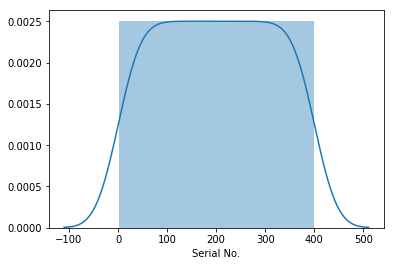

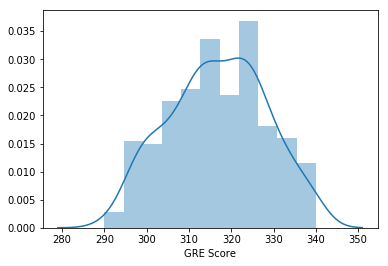

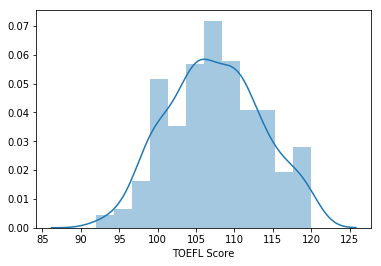

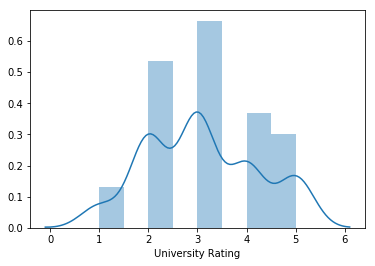

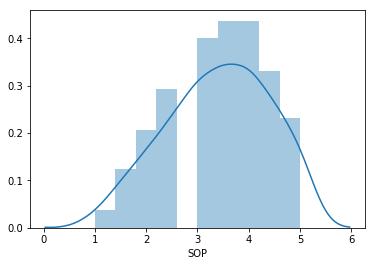

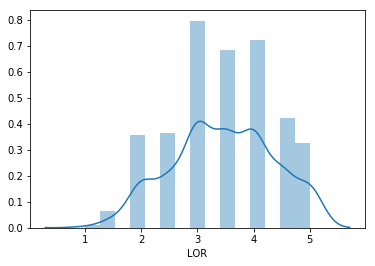

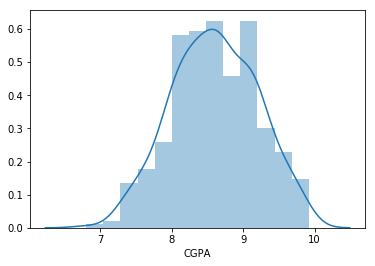

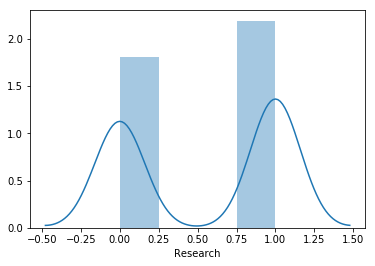

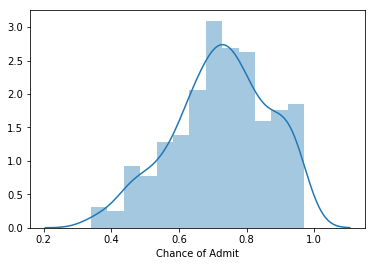

In [9]:
# checking distribution of each column
for col in df.columns:
    plt.figure()
    sns.distplot(df[col])

In [10]:
#checking for categorical datas
# research , sop and lor seeem to have categorical value
for col in df.columns:
    print(str(col) + ' distinct values : ' + str(len(df[col].value_counts())))

Serial No. distinct values : 400
GRE Score distinct values : 49
TOEFL Score distinct values : 29
University Rating distinct values : 5
SOP distinct values : 9
LOR distinct values : 9
CGPA distinct values : 168
Research distinct values : 2
Chance of Admit distinct values : 60


In [11]:
df['LOR'].head()
catList = ['Research','SOP','University Rating','LOR']
for col in catList:
    text = df[col].value_counts().index.tolist()
    print(str(col))
    print(', '.join(map(str, text)) )
    print('-----------------------------------------------')

Research
1, 0
-----------------------------------------------
SOP
3.5, 4.0, 3.0, 4.5, 2.5, 5.0, 2.0, 1.5, 1.0
-----------------------------------------------
University Rating
3, 2, 4, 5, 1
-----------------------------------------------
LOR
3.0, 4.0, 3.5, 4.5, 2.5, 2.0, 5.0, 1.5, 1.0
-----------------------------------------------


In [12]:
#checking correlation between columns
#CGPA GRE TOEFL and university rating seem primaty factors
dfCorr = df.corr()
dfCorr['Chance of Admit'].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.873289
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Serial No.           0.042336
Name: Chance of Admit, dtype: float64

<Figure size 432x288 with 0 Axes>

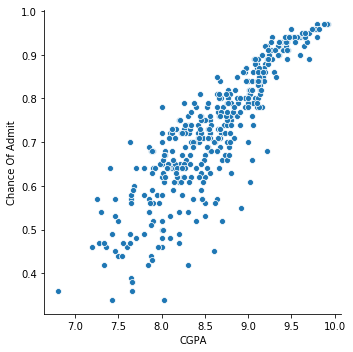

<Figure size 432x288 with 0 Axes>

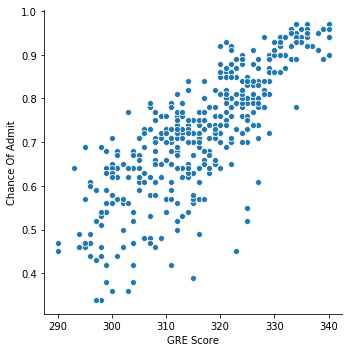

<Figure size 432x288 with 0 Axes>

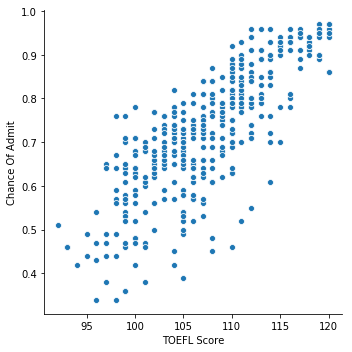

<Figure size 432x288 with 0 Axes>

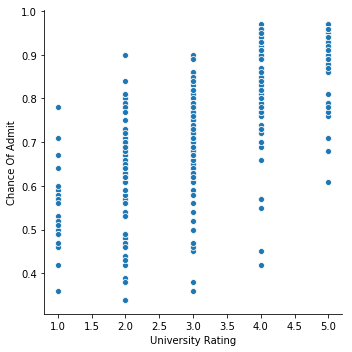

In [13]:
# cheking relation between chance of admit and oher parameters
primFact = ['CGPA','GRE Score','TOEFL Score','University Rating']
for fact in primFact:
    plt.figure()
    sns.relplot(x=fact, y='Chance of Admit', data=df)
    plt.ylabel('Chance Of Admit')
    plt.xlabel(fact)

<Figure size 432x288 with 0 Axes>

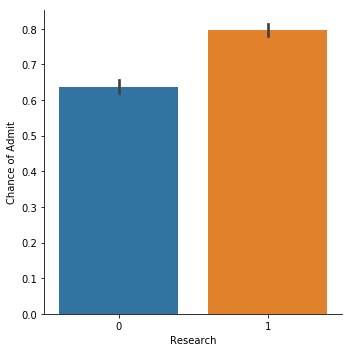

<Figure size 432x288 with 0 Axes>

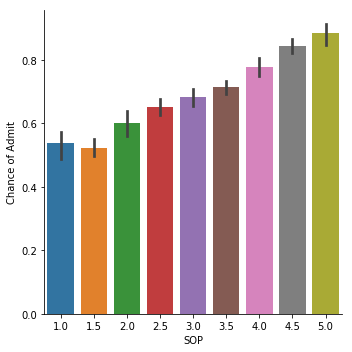

<Figure size 432x288 with 0 Axes>

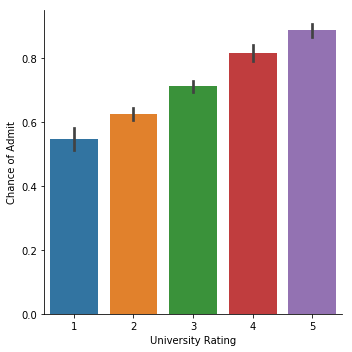

<Figure size 432x288 with 0 Axes>

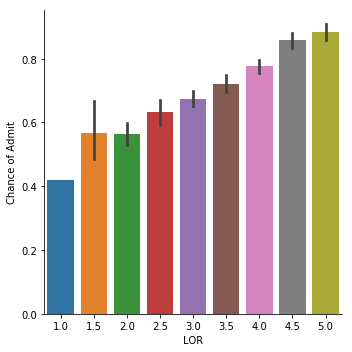

In [14]:
# ploting categorical distributions
for col in catList:
    plt.figure()
    sns.catplot(x=col,y='Chance of Admit',kind='bar',data=df)

# OUTLIER DETECTION

In [15]:
def detect_outliers(df,n,features):
    '''
    this function takes a dataframe of features and returns a list of indices
    corresponding to observations containing more than n outliers according 
    to turkey method
    '''
    outlier_indices = []
    
    for col in features:
        #1st quartile
        Q1 = np.percentile(df[col],25)
        #3rd quartile
        Q3 = np.percentile(df[col],75)
        #Interquartile range (IQR)
        IQR = Q3-Q1
        
        #outlier step
        outlier_step = 1.5 * IQR
        
        #determine list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | 
                             (df[col] > Q3 + outlier_step)].index
        
        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)
        
    return outlier_indices



In [16]:
outliers_to_drop = detect_outliers(df,2,df.columns)
outlierDf = df.loc[outliers_to_drop]

In [17]:
df = df.drop(outliers_to_drop,axis=0).reset_index(drop=True)

In [18]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


# REGRESSION ALGORITHMS

In [19]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [20]:
y = pd.DataFrame(df['Chance of Admit'])
x = df.drop(['Chance of Admit'],axis=1)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,
                                                random_state=42)

In [22]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns]) 
x_test[x_test.columns] = scaler.transform(x_test[x_test.columns])

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [24]:
RegModelScores = []
def predictFunc(model):
    model = model()
    model_name = model.__class__.__name__
    model.fit(x_train,y_train)
    model_score_test = model.score(x_test,y_test)
    model_score_train = model.score(x_train,y_train)
    model_pred = model.predict(x_test)
    plt.figure()
    sns.distplot(y_test,hist=False,color='blue')
    sns.distplot(model_pred,hist=False,color='green')
    plt.xlabel(model_name)
    RegModelScores.append([model_name,model_score_test,model_score_train])

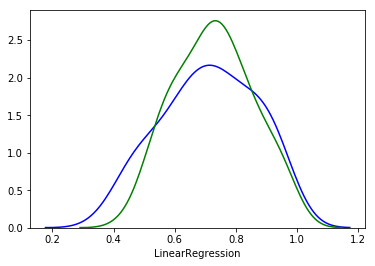

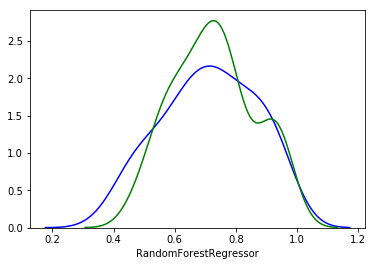

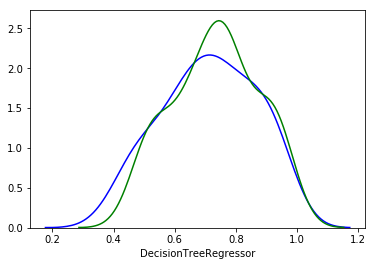

In [25]:
modelList = [LinearRegression,RandomForestRegressor,DecisionTreeRegressor]
for model in modelList:
    predictFunc(model)

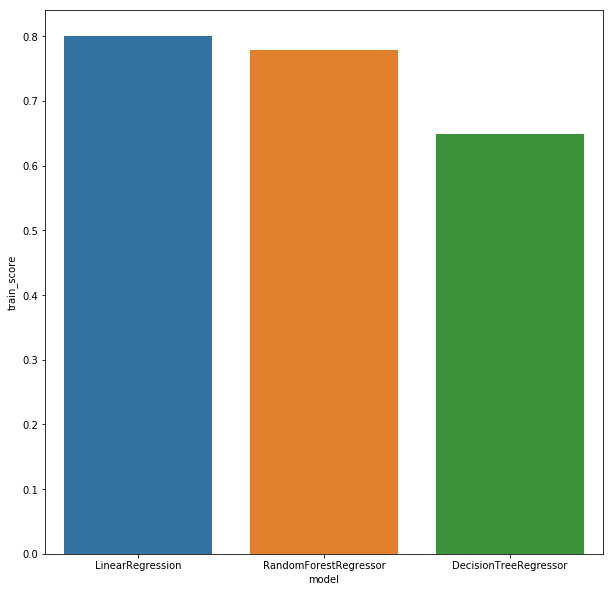

In [26]:

fig,ax = plt.subplots(figsize=(10,10))
dfReg = pd.DataFrame(RegModelScores,columns=['model','train_score','test_score'])
p2 = sns.catplot(ax=ax,x='model',y='train_score',data=dfReg,kind='bar')
plt.close(p2.fig)

# Classification Alogorithms


## preparin data for logistic regression

In [27]:
df = pd.read_csv('Admission_Predict.csv')
serialNo = df['Serial No.'].values
df.drop(['Serial No.'],axis=1,inplace=True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
df=df.rename(columns = {'LOR ':'LOR'})
y = pd.DataFrame(df['Chance of Admit'])
x = df.drop(['Chance of Admit'],axis=1)

In [28]:
# splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 random_state=42,
                                                 test_size=0.2)

In [29]:
#scaling data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_sc = ss.fit_transform(x_train)
x_test_sc = ss.transform(x_test)

In [30]:
#x_train.columns
x_train_f = pd.DataFrame(x_train_sc,columns=x_train.columns)
x_test_f = pd.DataFrame(x_test_sc,columns=x_test.columns)

In [31]:
#y_train = x_train_f.apply(lambda x: 1 )
y_train['Chance of Admit'] = y_train['Chance of Admit'].apply(
lambda x: 1 if x > 0.8 else 0 
)

In [32]:
y_test['Chance of Admit'] = y_test['Chance of Admit'].apply(
lambda x: 1 if x > 0.8 else 0 
)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [34]:
conMatList = []
prcList = []
clRep = []
rocDet = []
preScore = []
recScore = []
f1Score = []
yPred = []

def getClassModel(model):
    model = model()
    model_name = model.__class__.__name__
    model.fit(x_train_f,y_train)
    y_pred = model.predict(x_test_f)
    #plt.figure()
    #sns.distplot(y_test,hist=False,color='blue')
    #sns.distplot(y_pred,hist=False,color='green')
    #plt.title(model_name)
    
    yPred.append([model_name,y_pred])
    
    ## getting scores
    
    pre_score = precision_score(y_test,y_pred)
    rec_score = recall_score(y_test,y_pred)
    f1score = f1_score(y_test,y_pred)
    
    preScore.append([model_name,pre_score])
    recScore.append([model_name,rec_score])
    f1Score.append([model_name,f1score])
    
    #print(str(model_name) + ' precision score : ' + str(pre_score))
    #print(str(model_name) + ' recall score : ' + str(rec_score))
    #print(str(model_name) + ' f1 score : ' + str(f1score))
    #print('-------------------------------------------------------')
    
    ## getting confusion matrix
    
    cm = confusion_matrix(y_test,y_pred)
    matrix = pd.DataFrame(cm,columns=['Predicted 0','Predicted 1']
                     ,index = ['Actual 0','Actual 1'])
    conMatList.append([model_name,matrix])
    
    ## getting precision recall curve values
    
    precision, recall, thresholds = precision_recall_curve(y_test,y_pred)
    prcList.append([model_name,precision,recall,thresholds])
    
    ## roc details
    
    fpr,tpr,thresholds = roc_curve(y_test,y_pred)
    rocDet.append([model_name,fpr,tpr,thresholds])
    
    ## classification report 
    
    classRep = classification_report(y_test,y_pred)
    clRep.append([model_name,classRep])

In [35]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
kfold = StratifiedKFold(n_splits=10)
classModelList = [LogisticRegression,SVC,GaussianNB,DecisionTreeClassifier
                 ,RandomForestClassifier,KNeighborsClassifier]
for model in classModelList:
    getClassModel(model)

# getting cross validatoin scores for each model
cv_results = []
for model in classModelList:
    cv_results.append(cross_val_score(model(),x_train,y=y_train,scoring='accuracy',cv = kfold,n_jobs=4))

cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
model_name = []
for model in classModelList:
    modelIns = model()
    model_name.append(modelIns.__class__.__name__)
    
cv_res = pd.DataFrame({
    "CrossValMeans":cv_means,
    "CrossValErrors":cv_std,
    "Model":model_name
})
  
cv_res

,CrossValMeans,CrossValErrors,Model
0,0.888138,0.061050,LogisticRegression
1,0.906314,0.036206,SVC
2,0.899856,0.045495,GaussianNB
3,0.856207,0.052683,DecisionTreeClassifier
4,0.925165,0.014331,RandomForestClassifier
5,0.893707,0.048147,KNeighborsClassifier


LogisticRegression
SVC
GaussianNB
DecisionTreeClassifier
RandomForestClassifier
KNeighborsClassifier


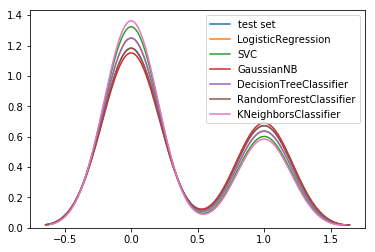

In [36]:
sns.distplot(y_test,hist=False,label='test set')
for pred in yPred:
    print(pred[0])
    sns.distplot(pred[1],hist=False,label=pred[0])

In [37]:
#conMatList,prcList ,clRep ,rocDet ,preScore ,recScore 
for mat in conMatList:
    print(mat[0])
    print(' ')
    print(mat[1])
    print('-----------------------------------------------')

LogisticRegression
 
          Predicted 0  Predicted 1
Actual 0           49            2
Actual 1            4           25
-----------------------------------------------
SVC
 
          Predicted 0  Predicted 1
Actual 0           50            1
Actual 1            5           24
-----------------------------------------------
GaussianNB
 
          Predicted 0  Predicted 1
Actual 0           49            2
Actual 1            1           28
-----------------------------------------------
DecisionTreeClassifier
 
          Predicted 0  Predicted 1
Actual 0           50            1
Actual 1            3           26
-----------------------------------------------
RandomForestClassifier
 
          Predicted 0  Predicted 1
Actual 0           49            2
Actual 1            2           27
-----------------------------------------------
KNeighborsClassifier
 
          Predicted 0  Predicted 1
Actual 0           49            2
Actual 1            7           22
-----------------

In [38]:
precisionDf = pd.DataFrame(preScore,columns=['model','precisionScore'])
recallDf = pd.DataFrame(recScore,columns=['model','recallScore'])
f1Df = pd.DataFrame(f1Score,columns=['model','f1Score'])
precisionDf['f1Score'] = f1Df['f1Score']
precisionDf['recallScore'] = recallDf['recallScore']
precisionDf

,model,precisionScore,f1Score,recallScore
0,LogisticRegression,0.925926,0.892857,0.862069
1,SVC,0.960000,0.888889,0.827586
2,GaussianNB,0.933333,0.949153,0.965517
3,DecisionTreeClassifier,0.962963,0.928571,0.896552
4,RandomForestClassifier,0.931034,0.931034,0.931034
5,KNeighborsClassifier,0.916667,0.830189,0.758621


LogisticRegression
SVC
GaussianNB
DecisionTreeClassifier
RandomForestClassifier
KNeighborsClassifier


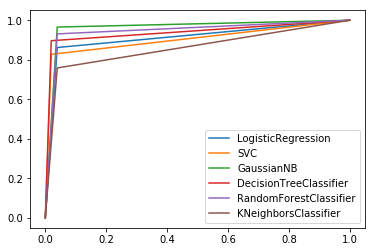

In [39]:
for roc in rocDet:
    print(roc[0])
    fpr = roc[1]
    tpr = roc[2]
    plt.plot(fpr,tpr,label=roc[0])
    plt.legend()

In [40]:
for cl in clRep:
    print(cl[0])
    print(' ')
    print(cl[1])
    print('--------------------------------------------')

LogisticRegression
 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        51
           1       0.93      0.86      0.89        29

   micro avg       0.93      0.93      0.93        80
   macro avg       0.93      0.91      0.92        80
weighted avg       0.93      0.93      0.92        80

--------------------------------------------
SVC
 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        51
           1       0.96      0.83      0.89        29

   micro avg       0.93      0.93      0.93        80
   macro avg       0.93      0.90      0.92        80
weighted avg       0.93      0.93      0.92        80

--------------------------------------------
GaussianNB
 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        51
           1       0.93      0.97      0.95        29

   micro avg       0.96      0.96      0.96        8

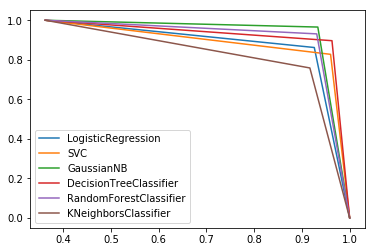

In [41]:
for prc in prcList:
    precision = prc[1]
    recall = prc[2]
    plt.plot(precision,recall,label=prc[0])
    plt.legend()

# ---------------- CLASSIFICATION WITH CROSS VALIDATION------------------

In [223]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

In [43]:
df = pd.read_csv('Admission_Predict.csv')
serialNo = df['Serial No.'].values
df.drop(['Serial No.'],axis=1,inplace=True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
df=df.rename(columns = {'LOR ':'LOR'})
y = pd.DataFrame(df['Chance of Admit'])
x = df.drop(['Chance of Admit'],axis=1)
y['Chance of Admit'] = y['Chance of Admit'].apply(
lambda x: 1 if x > 0.8 else 0 
)

In [44]:
#setting kfold value
kfold = KFold(n_splits = 10, shuffle=True, random_state=0)

In [45]:
x = pd.DataFrame(ss.fit_transform(x),columns=x.columns)

### getting cross validation scores ('accuracy','f1','precision','recall','roc_auc'])

In [46]:
classModelList = [LogisticRegression,SVC,GaussianNB,DecisionTreeClassifier
                 ,RandomForestClassifier,KNeighborsClassifier]
for model in classModelList:
    getClassModel(model)

# getting cross validatoin scores for each model
cv_results = []
for model in classModelList:
    cv_results.append(cross_val_score(model(),x_train,y=y_train,scoring='accuracy',cv = kfold,n_jobs=4))

cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
model_name = []
for model in classModelList:
    modelIns = model()
    model_name.append(modelIns.__class__.__name__)
    
cv_res = pd.DataFrame({
    "CrossValMeans":cv_means,
    "CrossValErrors":cv_std,
    "Model":model_name
})
  
cv_res

,CrossValMeans,CrossValErrors,Model
0,0.884375,0.039652,LogisticRegression
1,0.912500,0.051916,SVC
2,0.893750,0.042390,GaussianNB
3,0.871875,0.040625,DecisionTreeClassifier
4,0.915625,0.031406,RandomForestClassifier
5,0.896875,0.044305,KNeighborsClassifier


In [179]:
def getModelScores(model,scoringType):
    #modelNameList.append()
    scores = cross_val_score(model(),x,y,cv=kfold,scoring=scoringType)
    return scores.mean()
    #print(scores.mean())
    #print('--------------------------------')
    

In [215]:
accuracyScoreList = []
f1ScoreList = []
precisionScoreList = []
recallScoreList = []
roc_aucScoreList = []

scoreTypesList = ['accuracy','f1','precision','recall','roc_auc']

for model in classModelList:
    for scoreType in scoreTypesList:
        score = getModelScores(model,scoreType)
        globals()[scoreType+'ScoreList'].append(score)
            
accDf = pd.DataFrame({
    'Model':model_name
})
for scoreType in scoreTypesList:
    accDf[scoreType] = globals()[scoreType+'ScoreList']
accDf

,Model,accuracy,f1,precision,recall,roc_auc
0,LogisticRegression,0.9250,0.875575,0.870966,0.885155,0.980012
1,SVC,0.9300,0.873816,0.923333,0.839512,0.967015
2,GaussianNB,0.9125,0.865520,0.809199,0.940761,0.975382
3,DecisionTreeClassifier,0.9050,0.813842,0.806925,0.828371,0.877255
4,RandomForestClassifier,0.9300,0.885413,0.926528,0.846103,0.953728
5,KNeighborsClassifier,0.9150,0.849680,0.907026,0.812658,0.957937


In [221]:
from sklearn.model_selection import cross_validate
# getting score from cross_validate5
#cvScoreList = []
#scoring = ['accuracy','f1','precision','recall','roc_auc']
#for model in classModelList:
#    scores = cross_validate(model(), x, y, scoring=scoring,
#                            cv=kfold)
#    cvScoreList.append(scores)
#    print(pd.DataFrame(scores))
#    print('----------------------------------------------------------')
    


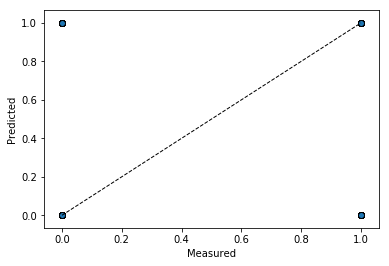

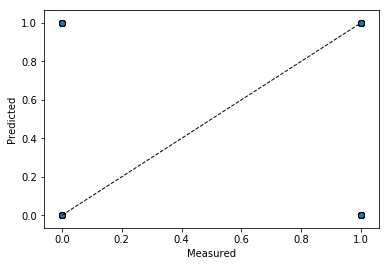

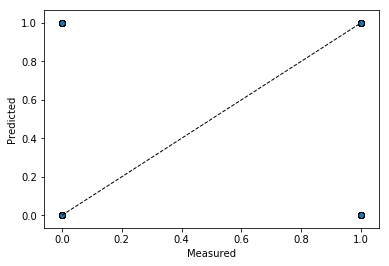

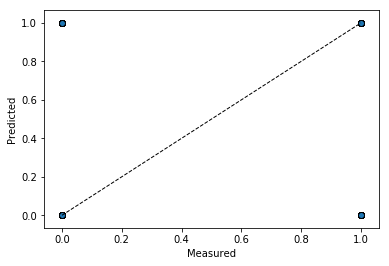

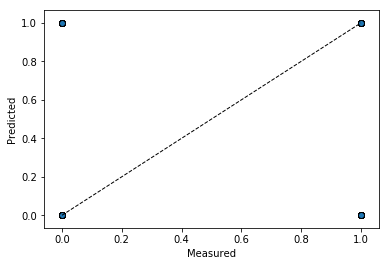

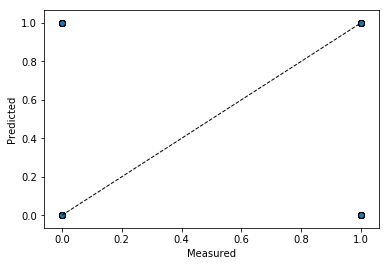

In [231]:
for model in classModelList:
    y_cv_pred = cross_val_predict(model(),x,y,cv=kfold)
    fig, ax = plt.subplots()
    ax.scatter(y, y_cv_pred, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

In [232]:
def plt_roc_curve(name, model, cv_x_test, cv_y_test, has_proba=True):
    if has_proba:
        fpr,tpr,thr=skplt.metrics.roc_curve(cv_y_test,model.predict_proba(cv_x_test)[:,1])
    else:
        fpr,tpr,thr=skplt.metrics.roc_curve(cv_y_test,model.decision_function(cv_x_test))
    auc= skplt.metrics.auc(fpr,tpr) #x axis is fpr, y axis is tpr

    plt.plot(fpr,tpr,label='ROC curve for %s (AUC = %0.8f)' % (name, auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    #plt.show()
    return fpr, tpr, auc

In [236]:
def run_k_fold(modeller, no_of_folds):
    scores = []
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []
    plt.figure(figsize =[10,9])
    
    k_fold = KFold(n_splits=no_of_folds, shuffle=True, random_state=0)
    fold = 1
    # the below line's x, y is from outside just now.
    #k_fold.split gives you all 10 rounds in a list of tuples [round1, round2,...]
    #each round consists of the rows to be in the training set (90%) and the rows to be in 
    #the test set (10%) for that round. 
    for rounds in k_fold.split(x, y): #don't use round as it is a in built function
        train_rows = rounds[0]
        test_rows  = rounds[1]
        CV_x_train = x.values[train_rows]
        CV_y_train = y.values[train_rows]
        CV_x_test = x.values[test_rows]
        CV_y_test = y.values[test_rows]
        model = modeller()
        model.fit(CV_x_train, CV_y_train)
        scores.append(model.score(CV_x_test, CV_y_test))
        curr_fpr, curr_tpr, curr_auc = plt_roc_curve(
            'log reg fold ' + str(fold), model, CV_x_test, CV_y_test)

        tprs.append(np.interp(mean_fpr, curr_fpr, curr_tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(curr_fpr, curr_tpr)
        aucs.append(roc_auc)
        fold += 1

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)  # popn std dev?
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.8f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return np.mean(scores)

In [237]:
for model in classModelList:
    run_k_fold(model,10)

NameError: name 'skplt' is not defined

<Figure size 720x648 with 0 Axes>